In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

In [ ]:


data = pd.read_csv('EEEDATA.csv', header=0)

if 'Unnamed: 0' in data.columns:
    new_df = data.drop('Unnamed: 0', axis='columns')
else:
    new_df = data.copy()
new_df.head(10)

,time,Ia,Ib,Ic,Vab,Vbc,Vca,Torque,Speed,Category
0,0.0000,0.000000,0.000000,0.000000,120.0,120.0,120.0,0.000000e+00,0.000000e+00,NOM
1,0.0005,0.000000,0.000000,0.000000,120.0,120.0,120.0,0.000000e+00,0.000000e+00,NOM
2,0.0010,34.985135,-69.970271,34.985135,120.0,120.0,120.0,-1.370000e-15,0.000000e+00,NOM
3,0.0015,105.028462,-210.056925,105.028462,120.0,120.0,120.0,1.760000e-13,-1.640000e-17,NOM
4,0.0020,171.958261,-343.916522,171.958261,120.0,120.0,120.0,2.370000e-12,2.070000e-15,NOM
5,0.0025,235.908750,-471.817500,235.908750,120.0,120.0,120.0,1.150000e-11,3.150000e-14,NOM
6,0.0030,297.013602,-594.027204,297.013602,120.0,120.0,120.0,3.390000e-11,1.820000e-13,NOM
7,0.0035,355.400491,-710.800983,355.400491,120.0,120.0,120.0,7.730000e-11,6.410000e-13,NOM
8,0.0040,339.595138,-786.584615,446.989477,120.0,120.0,120.0,1.228984e+01,1.700000e-12,NOM
9,0.0045,252.891986,-823.200034,570.308048,120.0,120.0,120.0,4.398902e+01,1.466992e-01,NOM


In [20]:
print(data.columns.tolist())

['time', 'Ia', 'Ib', 'Ic', 'Vab', 'Vbc', 'Vca', 'Torque', 'Speed', 'Category']


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      6005 non-null   float64
 1   Ia        6005 non-null   float64
 2   Ib        6005 non-null   float64
 3   Ic        6005 non-null   float64
 4   Vab       6005 non-null   float64
 5   Vbc       6005 non-null   float64
 6   Vca       6005 non-null   float64
 7   Torque    6005 non-null   float64
 8   Speed     6005 non-null   float64
 9   Category  6005 non-null   object 
dtypes: float64(9), object(1)
memory usage: 469.3+ KB


In [22]:
new_df.describe()

,time,Ia,Ib,Ic,Vab,Vbc,Vca,Torque,Speed
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6.005000e+03
mean,1.083430,26.783683,8.100337,-34.884020,438.703177,550.139143,554.458479,29.213072,1.712231e+03
std,0.493074,179.657369,174.209948,174.612873,151.945669,74.673937,75.805794,370.421781,3.336416e+02
min,0.000000,-911.458589,-954.113339,-851.885175,120.000000,120.000000,120.000000,-1936.073864,-1.640000e-17
25%,0.750500,-66.540914,-63.369809,-110.736237,293.341752,524.689899,527.414294,-256.234634,1.774603e+03
50%,1.166500,28.354434,11.592868,-45.336973,401.095579,581.006724,581.859766,18.921433,1.798145e+03
75%,1.417000,112.419480,89.872734,43.774928,586.540494,586.690598,596.997683,296.161759,1.815051e+03
max,2.000000,803.146919,864.071752,1161.606719,697.136201,702.978690,720.566795,1713.305539,1.966625e+03


In [23]:
new_df.isnull().sum()

time        0
Ia          0
Ib          0
Ic          0
Vab         0
Vbc         0
Vca         0
Torque      0
Speed       0
Category    0
dtype: int64

In [9]:
new_df.Category.value_counts()# data set is balanced to some extent. No need for corrective measures

Category
NOM    2001
PTG    1001
PTP    1001
OVT    1001
UVT    1001
Name: count, dtype: int64

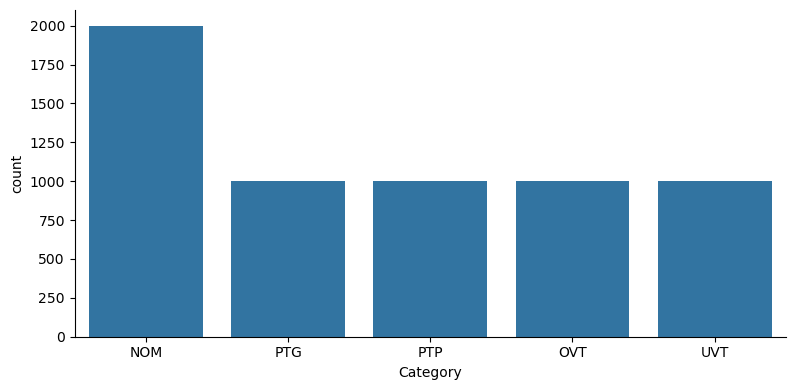

In [10]:
sns.catplot(data=new_df, x='Category', kind='count', height=4, aspect=2)

In [27]:
label_category = LabelEncoder()
new_df['Category'] = label_category.fit_transform(new_df['Category'])
new_df.head()

,time,Ia,Ib,Ic,Vab,Vbc,Vca,Torque,Speed,Category
0,0.0000,0.000000,0.000000,0.000000,120.0,120.0,120.0,0.000000e+00,0.000000e+00,0
1,0.0005,0.000000,0.000000,0.000000,120.0,120.0,120.0,0.000000e+00,0.000000e+00,0
2,0.0010,34.985135,-69.970271,34.985135,120.0,120.0,120.0,-1.370000e-15,0.000000e+00,0
3,0.0015,105.028462,-210.056925,105.028462,120.0,120.0,120.0,1.760000e-13,-1.640000e-17,0
4,0.0020,171.958261,-343.916522,171.958261,120.0,120.0,120.0,2.370000e-12,2.070000e-15,0


In [28]:
new_df['Category'].unique()

array([0, 2, 3, 1, 4])

In [29]:
new_df.Category.value_counts()

Category
0    2001
2    1001
3    1001
1    1001
4    1001
Name: count, dtype: int64

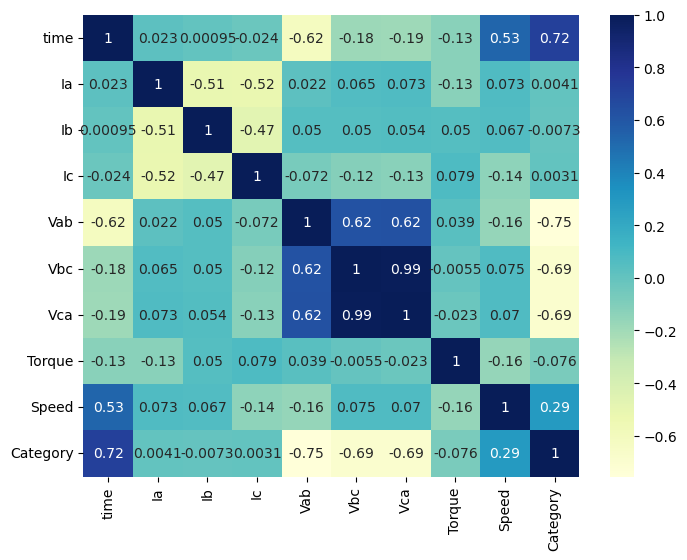

In [30]:
plt.figure(figsize=(8,6))
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True) 
# Correlation plot showing the correlation between continuous features and the target label

In [33]:
print(new_df.columns.tolist())

['Ia', 'Ib', 'Ic', 'Vab', 'Vbc', 'Vca', 'Speed', 'Category']


In [34]:
new_df = new_df.drop(['time', 'Torque'], axis=1, errors='ignore')

In [35]:
columns_to_drop = ['time', 'Torque']
existing_columns = [col for col in columns_to_drop if col in new_df.columns]
if existing_columns:
    new_df = new_df.drop(existing_columns, axis=1)

In [36]:
x = new_df.drop(['Category'], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ia      6005 non-null   float64
 1   Ib      6005 non-null   float64
 2   Ic      6005 non-null   float64
 3   Vab     6005 non-null   float64
 4   Vbc     6005 non-null   float64
 5   Vca     6005 non-null   float64
 6   Speed   6005 non-null   float64
dtypes: float64(7)
memory usage: 328.5 KB


In [37]:
y = new_df['Category']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6005 entries, 0 to 6004
Series name: Category
Non-Null Count  Dtype
--------------  -----
6005 non-null   int32
dtypes: int32(1)
memory usage: 23.6 KB


In [38]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy = "mean"),
    MinMaxScaler()
)
numeric_transformer.fit(x)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

In [39]:
X = numeric_transformer.transform(x)
X = pd.DataFrame(X, columns = x.columns)
X.head()

,Ia,Ib,Ic,Vab,Vbc,Vca,Speed
0,0.531585,0.524761,0.423088,0.0,0.0,0.0,8.339158e-21
1,0.531585,0.524761,0.423088,0.0,0.0,0.0,8.339158e-21
2,0.551989,0.486278,0.440464,0.0,0.0,0.0,8.339158e-21
3,0.592840,0.409230,0.475251,0.0,0.0,0.0,0.000000e+00
4,0.631875,0.335608,0.508491,0.0,0.0,0.0,1.060904e-18


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) 
# splitting the dataset into training and testing subset

In [41]:
cv = KFold(n_splits=5)
params = [{'n_neighbors': np.arange(1, 50, 2),
           'weights': ['uniform', 'distance'],
           'p': [1,2],
           'n_jobs': [-1]
          }]
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=cv)
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_jobs': [-1],
                          'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [42]:
clf.best_params_

{'n_jobs': -1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=23, weights='uniform', p=1, n_jobs=-1 )
cv = KFold(n_splits=10)
scores_knn = pd.DataFrame(cross_validate(knn_clf, X_train, y_train, scoring= 'accuracy', cv=cv, n_jobs=-1, 
error_score='raise', return_train_score=True))

In [44]:
scores_knn.mean()

fit_time       0.008666
score_time     0.058451
test_score     0.849712
train_score    0.877116
dtype: float64

In [45]:
knn_clf.fit(X_train, y_train)
knn_pred=knn_clf.predict(X_test)
accuracy_score(y_test, knn_pred)

0.855120732722731

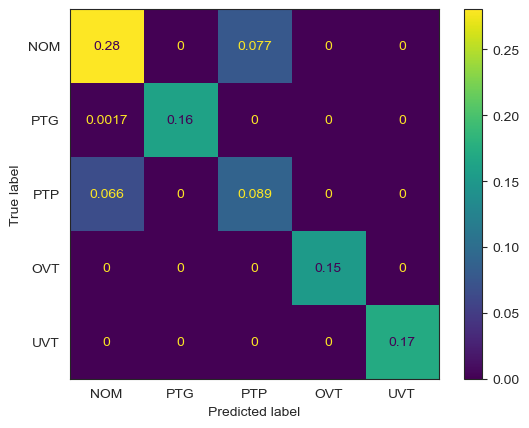

In [47]:
cm = confusion_matrix(y_test, knn_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NOM","PTG","PTP","OVT","UVT"])
sns.set_style("white")
plt.rc('font', size=10)
disp.plot()
plt.show()